In [813]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
plt.style.use('seaborn-poster')

In [814]:
xawal = np.arange(0, 540, 20)
yawal = [
    0, 139, 298, 433, 685, 1026, 1279, 1373, 1490, 1634, 1800, 1986, 2191,
    2417, 2651, 2915, 3203, 3516, 3860, 4216, 4630, 5092, 5612, 6184, 6760,
    7327, 7581
]

# Mencari y, tetapi x nya intervalnya 1, karena kita ingin lebih presisi
# dan X adalah data dari 0 sampai 520 dengan interval 1.
X = np.arange(0, 522, 1)
# Menggunakan Cubic Spline untuk mencari y untuk saat X
f = CubicSpline(xawal, yawal, bc_type="natural")
# Hitung y dari X yang baru.
Y = f(X)

In [815]:
def simpson_rule(x, y):
    diff = x[1] - x[0]
    size = x.size
    yakhir = 0
    simpson1per3 = 0

    # Simpson 1/3 Rule
    for i in range(size):
        yIntegral = 0
        # Pertama dan akhir tidak dikali apa - apa.
        if i == 3 or i == size-1:
            yIntegral = y[i]
        else:
            # Mempunyai pola 1 4 2 4 ... 2 4 1
            # Ketika i adalah ganjil maka dikali 2
            # Ketika i adalah genap maka dikali 4
            if i % 2 == 1:
                yIntegral = 2*y[i]
            else:
                yIntegral = 4*y[i]
        simpson1per3 += yIntegral
    simpson1per3 = simpson1per3 * diff / 3
    yakhir = simpson1per3
    return yakhir

def first_central_difference(x, y, t):
    # Karena data 0 ada di index 0, dan seterusnya
    # maka index = angka
    difference = x[1] - x[0]
    index = t
    return (y[index + 1] - y[index - 1]) / (2 * difference)

In [816]:
interval = 2
iterasi = x.size
jarak = [-8]
percepatan = []

while (interval != 522):
    x = np.arange(0, interval, 1)
    y = Y
    # Dikurangi 8 karena starting point kita 8 meter di bawah permukaan laut.
    simpson = simpson_rule(x, y) - 8
    jarak.append(simpson)
    print(f"Jarak saat t={x[len(x)-1]} adalah {simpson} meter")
    # Karena kita menggunakan first central difference, maka data terakhir akan hilang.
    central = first_central_difference(x, y, x[len(x)-1])
    percepatan.append(central)
    interval = interval + 1

Jarak saat t=1 adalah -5.829851966201249 meter
Jarak saat t=2 adalah 0.6827954229073026 meter
Jarak saat t=3 adalah 20.229550741082154 meter
Jarak saat t=4 adalah 28.932175753400152 meter
Jarak saat t=5 adalah 65.93485671359389 meter
Jarak saat t=6 adalah 89.92766590955661 meter
Jarak saat t=7 adalah 144.5360960762056 meter
Jarak saat t=8 adalah 177.3967768629088 meter
Jarak saat t=9 adalah 249.83128500724297 meter
Jarak saat t=10 adalah 291.6920346474246 meter
Jarak saat t=11 adalah 382.2434547474675 meter
Jarak saat t=12 adalah 433.2717231072624 meter
Jarak saat t=13 adalah 542.3013943478311 meter
Jarak saat t=14 adalah 602.6998838967706 meter
Jarak saat t=15 adalah 730.639650669476 meter
Jarak saat t=16 adalah 800.6463164804886 meter
Jarak saat t=17 adalah 947.9985283837347 meter
Jarak saat t=18 adalah 1027.8865781331458 meter
Jarak saat t=19 adalah 1195.2240899721305 meter
Jarak saat t=20 adalah 1285.3019839396613 meter
Jarak saat t=21 adalah 1473.2667857719973 meter
Jarak saat t=2

In [817]:
interval = 2
percepatan = []

# Set kembali interval menjadi 2
interval = 2
while(interval != 522):
    x = np.arange(0, interval, 1)
    y = Y
    central = first_central_difference(x, y, x[len(x)-1])
    print(f"Percepatan saat t={x[len(x)-1]} adalah {central} meter")
    percepatan.append(central)
    interval = interval + 1

Percepatan saat t=1 adalah 6.513749032964701 meter
Percepatan saat t=2 adalah 6.523663827670049 meter
Percepatan saat t=3 adalah 6.540188485512295 meter
Percepatan saat t=4 adalah 6.563323006491437 meter
Percepatan saat t=5 adalah 6.593067390607484 meter
Percepatan saat t=6 adalah 6.629421637860425 meter
Percepatan saat t=7 adalah 6.672385748250264 meter
Percepatan saat t=8 adalah 6.721959721777004 meter
Percepatan saat t=9 adalah 6.7781435584406395 meter
Percepatan saat t=10 adalah 6.840937258241173 meter
Percepatan saat t=11 adalah 6.9103408211786075 meter
Percepatan saat t=12 adalah 6.9863542472529545 meter
Percepatan saat t=13 adalah 7.068977536464182 meter
Percepatan saat t=14 adalah 7.1582106888122965 meter
Percepatan saat t=15 adalah 7.254053704297327 meter
Percepatan saat t=16 adalah 7.356506582919252 meter
Percepatan saat t=17 adalah 7.465569324678071 meter
Percepatan saat t=18 adalah 7.581241929573807 meter
Percepatan saat t=19 adalah 7.703524397606429 meter
Percepatan saat t

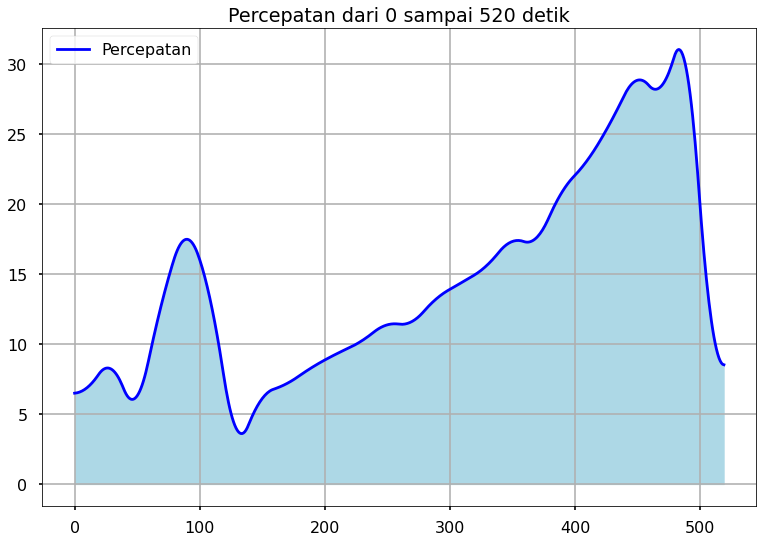

In [818]:
plt.title("Percepatan dari 0 sampai 520 detik")
plt.plot(X[:len(percepatan)], percepatan, "b", label="Percepatan")
plt.fill_between(X[:len(percepatan)], percepatan, color='lightblue')
plt.grid()
plt.legend()
plt.show()

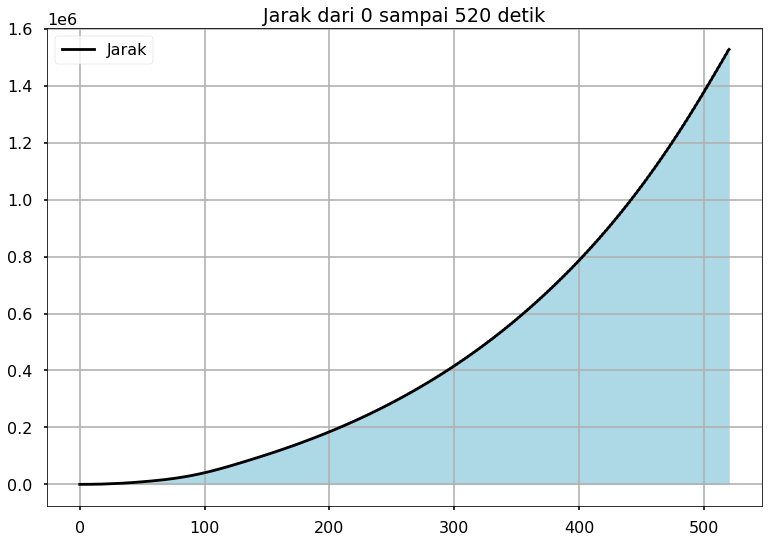

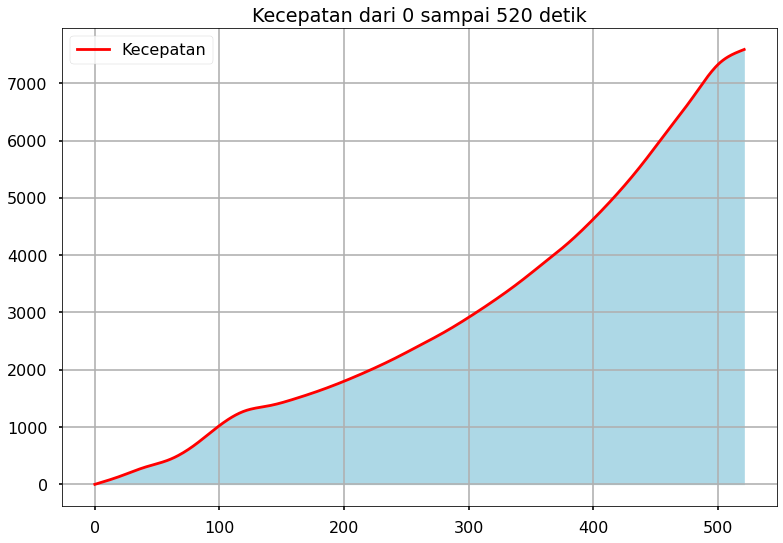

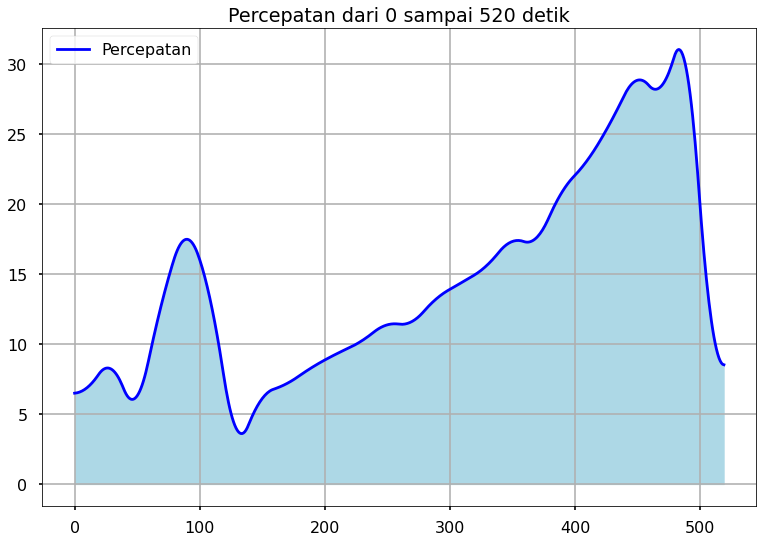

In [819]:
plt.title("Jarak dari 0 sampai 520 detik")
plt.plot(X[:len(jarak)], jarak, "k", label="Jarak")
plt.fill_between(X[:len(jarak)], jarak, color='lightblue')
plt.grid()
plt.legend()
plt.show()

plt.title("Kecepatan dari 0 sampai 520 detik")
plt.plot(X, Y, "r", label="Kecepatan")
plt.fill_between(X, Y, color='lightblue')
plt.grid()
plt.legend()
plt.show()

plt.title("Percepatan dari 0 sampai 520 detik")
plt.plot(X[:len(percepatan)], percepatan, "b", label="Percepatan")
plt.fill_between(X[:len(percepatan)], percepatan, color='lightblue')
plt.grid()
plt.legend()
plt.show()